# Vladimir Nikiforov

### PART 0 - PREPARE ENV

In [1]:
# Stop previously runned server
!docker stop ht_pg_server
!docker rm $(docker ps -a -q)
!docker rmi $(docker images -q)

ht_pg_server
74c19080eb4c
Untagged: postgres:11
Untagged: postgres@sha256:68b49a280d2fbe9330c0031970ebb72015e1272dfa25f0ed7557514f9e5ad7b7
Deleted: sha256:53912975086f1470f877922e3eb79c4f17c403fcb0b51b1f45df9b623987600e
Deleted: sha256:859135cc89a4161becb56082dc95772d26d157bc67622be28ccab159cee9c520
Deleted: sha256:85d5ba072f703aed8ed136ee24ef0a5c22fb818e307db40be0637df1691546fe
Deleted: sha256:44bc37a16317acf120ebcb0b8aa2cf8738f0dcc40ca47f18d9d5789099089cd0
Deleted: sha256:050e2fbc4c511fff109624929dcc24d61f4565052ffd6e30e3d46d42ce65c576
Deleted: sha256:6e7901ce413d382c6544cf07b5370341507a4734525947ecef28944c041e39b6
Deleted: sha256:c0d5a0e28851bc9a301c0cb92e03c036c1a4b0d8da1efc4a16a921abdd641e3e
Deleted: sha256:21cf04dd5b4e7ddbe4a7f122b532038c351eef9057ff71940a1a0a36069fabd5
Deleted: sha256:5eba02d7eb8edfd2d0c4503cd6976cfb526e96c4f62960bac5efdf86a1e71e4f
Deleted: sha256:0e0ff67afa7921baa6b3c7afd83664752663b5b8704c5236941359003e6f8887
Deleted: sha256:915e9e2c13848dc5933cea4c23b53649971

In [2]:
# Run the server:
!docker run -d --name ht_pg_server -v ht_dbdata:/var/lib/postgresql/data -p 54320:5432 postgres:11

Unable to find image 'postgres:11' locally
11: Pulling from library/postgres














Digest: sha256:68b49a280d2fbe9330c0031970ebb72015e1272dfa25f0ed7557514f9e5ad7b7
Status: Downloaded newer image for postgres:11
e72c914ed97202ccf7801714d9c566844e4cbab2e7b84292a41a1eaf8aeb78b2


In [3]:
# Checking the logs to see if it is running:
!docker logs ht_pg_server

2019-07-21 14:19:36.820 UTC [1] LOG:  listening on IPv4 address "0.0.0.0", port 5432
2019-07-21 14:19:36.820 UTC [1] LOG:  listening on IPv6 address "::", port 5432
2019-07-21 14:19:36.830 UTC [1] LOG:  listening on Unix socket "/var/run/postgresql/.s.PGSQL.5432"
2019-07-21 14:19:36.863 UTC [26] LOG:  database system was interrupted; last known up at 2019-07-20 16:15:15 UTC


In [4]:
# Creating the database:
!docker exec -it ht_pg_server psql -U postgres -c "drop database ht_db"
!docker exec -it ht_pg_server psql -U postgres -c "create database ht_db"

DROP DATABASE
CREATE DATABASE


In [5]:
!cat ../code/etl.py

import psycopg2 as pg
import yaml
from pathlib import Path
import os
import pandas as pd

def create_tables(config, connection):
    cur = connection.cursor()
    for table in config:
        name = table.get('name')
        schema = table.get('schema')
        ddl = f"""CREATE TABLE IF NOT EXISTS {name} ({schema})"""
        cur.execute(ddl)

    connection.commit()
    cur.close()

def transform_tables(config):

    data_path = "../data/"

    for table in config:
        table_name = table.get('name')
        table_source = os.path.join(data_path,f"{table_name}.csv")
        table_cols = []
        for i in table.get('columns'):
            table_cols.append(str.upper(i))
        df = pd.read_csv(table_source)
        df_reorder = df[table_cols]  # rearrange column here
        df_reorder.to_csv(table_source, index=False)

def load_tables(config, connection):

    # iterate and load
    cur = connection.cursor()
    data_path = "../data/"

    for table in config:
        table_name

In [6]:
!python ../code/etl.py

/home/truename/anaconda3/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


### PART I - DATABASES

In [7]:
import psycopg2

/home/truename/anaconda3/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [8]:
def get_values(table, connection: psycopg2.extensions.connection):
    c = connection.cursor()
    c.execute(f"SELECT * FROM {table};")
    result = c.fetchone()
    print(result)
    c.close()

In [9]:
# Create connection to DB
connection = psycopg2.connect(
    host='localhost',
    port=54320,
    dbname='ht_db',
    user='postgres',
)

In [10]:
# Test table Users
get_values("users", connection)

('1872820f-e3ac-4c02-bdc7-727897b60043', True, 'GB||JE||IM||GG', False, datetime.date(2018, 5, 25), datetime.datetime(2017, 8, 6, 7, 33, 33, 341000), 'ACTIVE', 'GB', 1971, 'PASSED', 0)


In [11]:
# Test table Transactions
get_values("transactions", connection)

('GBP', 175, 'COMPLETED', datetime.datetime(2017, 12, 20, 12, 46, 20, 294000), 'cafe', 'GBR', 'cont', '8f99c254-7cf2-4e35-b7e4-53804d42445d', 'CARD_PAYMENT', 'GAIA', 'b3332e6f-7865-4d6e-b6a5-370bc75568d8')


In [12]:
# Test table Countries
get_values("countries", connection)

('AF', 'Afghanistan', 'AFG', 4, 93)


In [13]:
# Test table Currency_details
get_values("currency_details", connection)

('AED', 2, False)


In [14]:
# Test table Fraudsters
get_values("fraudsters", connection)

('5270b0f4-2e4a-4ec9-8648-2135312ac1c4',)


In [15]:
# Close connection to DB
connection.close()

Database created and filled by data.

### PART II - EXPLORATION, ANALYSIS, MODELLING & OPERATIONALIZATION

The fraudsters table indicates some individuals who have been marked as fraudsters. The goal is to use the data and your knowledge of Revolut to design an ML algorithm to identify fraudsters and conduct necessary actions. You should be considering the consequential impact of the model and its decisions on all domains (e.g. customers, revolut brand, internal processes, etc.).

Unless explicitly stated, you do not have the read/write the data from/to the PostgreSQL database. Instead you may just utilize read_csv() methods in Pandas/Dask/anything else.

    a) Explore the data for identified fraudsters and other users. What are your preliminary observations? 

    b) Feature Engineering
        i) Utilizing your findings from part a) and some creativity, create some features. Explain your reasoning behind the features.
        ii) Make a features.py script which when executed will create these features and store them in the DB. 

    c) Model Selection/Validation
        i) Create an ML model which identifies fraudsters. Assess the quality of your model and explain.
        ii) Make a train.py file which generates the fitted model artifact (it should be stored under the artifacts sub-directory).

    d) Operationalization
        i) How will you utilize this model to catch fraudsters? If a fraudster is identified, what should be the resulting action: LOCK_USER, ALERT_AGENT, or BOTH? Explain.
        ii) Make a patrol.py file and write a simple function which implements your logic from above. The function should accept a user_id and yield the suggested action(s) (e.g. patrol(user_id) = [‘LOCK_USER’, ‘ALERT_AGENT’])

LOCK_USER - Current transaction is blocked and user’s account is LOCKED. This prevents the user from performing any transactions with their Revolut account. Access can only be restored after contacting an agent.

ALERT_AGENT - Current transaction is not blocked. An alert is sent to a transaction monitoring agent for further review.

## Data
1. countries.csv
	- a table with all alpha-numeric representations of countries. You may need to use this to standardise country codes to one format
2. fraudsters.csv
	- this just holds a list of IDs of users who have been identified as fraudsters for this problem
	- there are others in the users table who are fraudsters, the challenge is to identify them as well
3. users.csv
	- a table of user data
	- **kyc** column indicates the status of the user's identity verification process
	- **terms_version** column indiciates the user's current version of the Revolut app
	- **state**
		LOCKED - the user's account is locked and they cannot perform any transactions. If there are transactions for this user, they occurred before the user was LOCKED.

4. transactions.csv
	- all transactions conducted by users
	- **amount** and **amount_usd** is denominated in integers at the lowest unit. e.g. 5000 USD => 50 USD (because the lowest unit in USD is a cent, w/ 100 cents = 1 dollar)
	- **entry_method** is only relevant for card transactions (CARD_PAYMENT, ATM); you may ignore it for other transactions. The values are:
		misc - unknown
		chip - chip on card
		mags - magstripe on card
		manu - manual entry of card details
		cont - contactless/tap 
		mcon - special case of magstripe & contactless
	- **source** is associated with an external party we use for handling this type of transaction. (e.g. all {CARD_PAYMENT, ATM} use GAIA)
	- **type**
		P2P - sending money internally through the Revolut platform (e.g. send money without bank account)
		BANK_TRANSFER - sending money externally to a bank account
		ATM - withdrawing money from an ATM. Revolut does not support ATM deposits at the moment

	- **state** 
		COMPLETED - the transaction was completed and the user's balance was changed
		DECLINED/FAILED - the transaction was declined for some reason, usually pertains to insufficient balance 
		REVERTED - the associated transaction was completed first but was then rolled back later in time potentially due to customer reaching out to Revolut

5. currency_details.csv
	- a table with iso codes and exponents for currencies
	- **exponent** column can be used to convert the integer amounts in the transactions table into cash amounts. (e.g for 5000 GBP, exponent = 2, so we apply: 5000/(10^2) = 50 GBP)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import dateutil

%matplotlib inline

### Check all datasets

In [17]:
trn_df = pd.read_csv('../data/transactions.csv')
print(trn_df.shape)
trn_df.head()

(688651, 11)


,CURRENCY,AMOUNT,STATE,CREATED_DATE,MERCHANT_CATEGORY,MERCHANT_COUNTRY,ENTRY_METHOD,USER_ID,TYPE,SOURCE,ID
0,GBP,175,COMPLETED,2017-12-20 12:46:20.294,cafe,GBR,cont,8f99c254-7cf2-4e35-b7e4-53804d42445d,CARD_PAYMENT,GAIA,b3332e6f-7865-4d6e-b6a5-370bc75568d8
1,EUR,2593,COMPLETED,2017-12-20 12:38:47.232,bar,AUS,cont,ed773c34-2b83-4f70-a691-6a7aa1cb9f11,CARD_PAYMENT,GAIA,853d9ff8-a007-40ef-91a2-7d81e29a309a
2,EUR,1077,COMPLETED,2017-12-20 12:34:39.668,NaN,CZE,cont,eb349cc1-e986-4bf4-bb75-72280a7b8680,CARD_PAYMENT,GAIA,04de8238-7828-4e46-91f1-050a9aa7a9df
3,GBP,198,COMPLETED,2017-12-20 12:45:50.555,supermarket,GBR,cont,dc78fbc4-c936-45d3-a813-e2477ac6d74b,CARD_PAYMENT,GAIA,2b790b9b-c312-4098-a4b3-4830fc8cda53
4,EUR,990,COMPLETED,2017-12-20 12:45:32.722,NaN,FRA,cont,32958a5c-2532-42f7-94f9-127f2a812a55,CARD_PAYMENT,GAIA,6469fc3a-e535-41e9-91b9-acb46d1cc65d


In [18]:
cntr_df = pd.read_csv('../data/countries.csv')
print(cntr_df.shape)
cntr_df.head()

(226, 5)


,CODE,NAME,CODE3,NUMCODE,PHONECODE
0,AF,Afghanistan,AFG,4,93
1,AL,Albania,ALB,8,355
2,DZ,Algeria,DZA,12,213
3,AS,American Samoa,ASM,16,1684
4,AO,Angola,AGO,24,244


In [19]:
cur_df = pd.read_csv('../data/currency_details.csv')
print(cur_df.shape)
cur_df.head()

(184, 3)


,CCY,EXPONENT,IS_CRYPTO
0,AED,2,False
1,AFN,2,False
2,ALL,2,False
3,AMD,2,False
4,ANG,2,False


In [20]:
fraud_df = pd.read_csv('../data/fraudsters.csv')
print(fraud_df.shape)
fraud_df.head()

(298, 1)


,USER_ID
0,5270b0f4-2e4a-4ec9-8648-2135312ac1c4
1,848fc1b1-096c-40f7-b04a-1399c469e421
2,27c76eda-e159-4df3-845a-e13f4e28a8b5
3,a27088ef-9452-403d-9bbb-f7b10180cdda
4,fb23710b-609a-49bf-8a9a-be49c59ce6de


In [21]:
user_df = pd.read_csv('../data/users.csv')
print(user_df.shape)
user_df.head()

(9944, 11)


,ID,HAS_EMAIL,PHONE_COUNTRY,IS_FRAUDSTER,TERMS_VERSION,CREATED_DATE,STATE,COUNTRY,BIRTH_YEAR,KYC,FAILED_SIGN_IN_ATTEMPTS
0,1872820f-e3ac-4c02-bdc7-727897b60043,1,GB||JE||IM||GG,False,2018-05-25,2017-08-06 07:33:33.341000,ACTIVE,GB,1971,PASSED,0
1,545ff94d-66f8-4bea-b398-84425fb2301e,1,GB||JE||IM||GG,False,2018-01-01,2017-03-07 10:18:59.427000,ACTIVE,GB,1982,PASSED,0
2,10376f1a-a28a-4885-8daa-c8ca496026bb,1,ES,False,2018-09-20,2018-05-31 04:41:24.672000,ACTIVE,ES,1973,PASSED,0
3,fd308db7-0753-4377-879f-6ecf2af14e4f,1,FR,False,2018-05-25,2018-06-01 17:24:23.852000,ACTIVE,FR,1986,PASSED,0
4,755fe256-a34d-4853-b7ca-d9bb991a86d3,1,GB||JE||IM||GG,False,2018-09-20,2017-08-09 15:03:33.945000,ACTIVE,GB,1989,PASSED,0


### Let's start with USERS

In [22]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9944 entries, 0 to 9943
Data columns (total 11 columns):
ID                         9944 non-null object
HAS_EMAIL                  9944 non-null int64
PHONE_COUNTRY              9944 non-null object
IS_FRAUDSTER               9944 non-null bool
TERMS_VERSION              8417 non-null object
CREATED_DATE               9944 non-null object
STATE                      9944 non-null object
COUNTRY                    9944 non-null object
BIRTH_YEAR                 9944 non-null int64
KYC                        9944 non-null object
FAILED_SIGN_IN_ATTEMPTS    9944 non-null int64
dtypes: bool(1), int64(3), object(7)
memory usage: 786.7+ KB


In [23]:
# There are NaN in TERMS_VERSION - fill it by "Undefined" version
user_df['TERMS_VERSION'] = user_df['TERMS_VERSION'].fillna("Undefined")

In [24]:
user_df['IS_FRAUDSTER'].value_counts()

False    9646
True      298
Name: IS_FRAUDSTER, dtype: int64

In [25]:
# Check that we have the same users as fraudsters in two datasets
set(user_df[user_df['IS_FRAUDSTER']==True]['ID'].values).issubset(set(fraud_df['USER_ID'].values)) and set(fraud_df['USER_ID'].values).issubset(set(user_df[user_df['IS_FRAUDSTER']==True]['ID'].values))

True

In [26]:
user_df[user_df['IS_FRAUDSTER']==True].head()

,ID,HAS_EMAIL,PHONE_COUNTRY,IS_FRAUDSTER,TERMS_VERSION,CREATED_DATE,STATE,COUNTRY,BIRTH_YEAR,KYC,FAILED_SIGN_IN_ATTEMPTS
8166,5270b0f4-2e4a-4ec9-8648-2135312ac1c4,1,GB||JE||IM||GG,True,Undefined,2017-09-19 01:55:22.376000,LOCKED,GB,1988,NONE,0
8167,848fc1b1-096c-40f7-b04a-1399c469e421,1,PL,True,2018-05-25,2018-06-16 15:55:43.800000,LOCKED,GB,1994,PASSED,0
8168,27c76eda-e159-4df3-845a-e13f4e28a8b5,1,GB||JE||IM||GG,True,2018-05-25,2018-05-11 18:20:45.608000,LOCKED,GB,1997,PASSED,0
8169,a27088ef-9452-403d-9bbb-f7b10180cdda,1,IN,True,2018-05-25,2018-05-18 16:41:12.267000,LOCKED,BE,1989,PASSED,0
8170,fb23710b-609a-49bf-8a9a-be49c59ce6de,1,LT,True,2018-03-20,2018-03-29 13:37:29.736000,LOCKED,LT,1992,PASSED,0


In [27]:
# Check that only fraudsters are locked, so we aren't longer need to have STATE of user
user_df[user_df['IS_FRAUDSTER']==True]['STATE'].value_counts()

LOCKED    298
Name: STATE, dtype: int64

In [28]:
user_df.drop('STATE', axis=1, inplace=True)

In [29]:
# Create AGE variable as age on CREATED_DATE date of profile in system
user_df['AGE'] = user_df.apply(lambda x: datetime.strptime(x['CREATED_DATE'], '%Y-%m-%d %H:%M:%S.%f').year-x['BIRTH_YEAR'], axis=1)

In [30]:
user_df.head()

,ID,HAS_EMAIL,PHONE_COUNTRY,IS_FRAUDSTER,TERMS_VERSION,CREATED_DATE,COUNTRY,BIRTH_YEAR,KYC,FAILED_SIGN_IN_ATTEMPTS,AGE
0,1872820f-e3ac-4c02-bdc7-727897b60043,1,GB||JE||IM||GG,False,2018-05-25,2017-08-06 07:33:33.341000,GB,1971,PASSED,0,46
1,545ff94d-66f8-4bea-b398-84425fb2301e,1,GB||JE||IM||GG,False,2018-01-01,2017-03-07 10:18:59.427000,GB,1982,PASSED,0,35
2,10376f1a-a28a-4885-8daa-c8ca496026bb,1,ES,False,2018-09-20,2018-05-31 04:41:24.672000,ES,1973,PASSED,0,45
3,fd308db7-0753-4377-879f-6ecf2af14e4f,1,FR,False,2018-05-25,2018-06-01 17:24:23.852000,FR,1986,PASSED,0,32
4,755fe256-a34d-4853-b7ca-d9bb991a86d3,1,GB||JE||IM||GG,False,2018-09-20,2017-08-09 15:03:33.945000,GB,1989,PASSED,0,28


In [31]:
# We don't need BIRTH_YEAR anymore - drop it
user_df.drop('BIRTH_YEAR', axis=1, inplace=True)

/home/truename/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/truename/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/truename/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/truename/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **pas

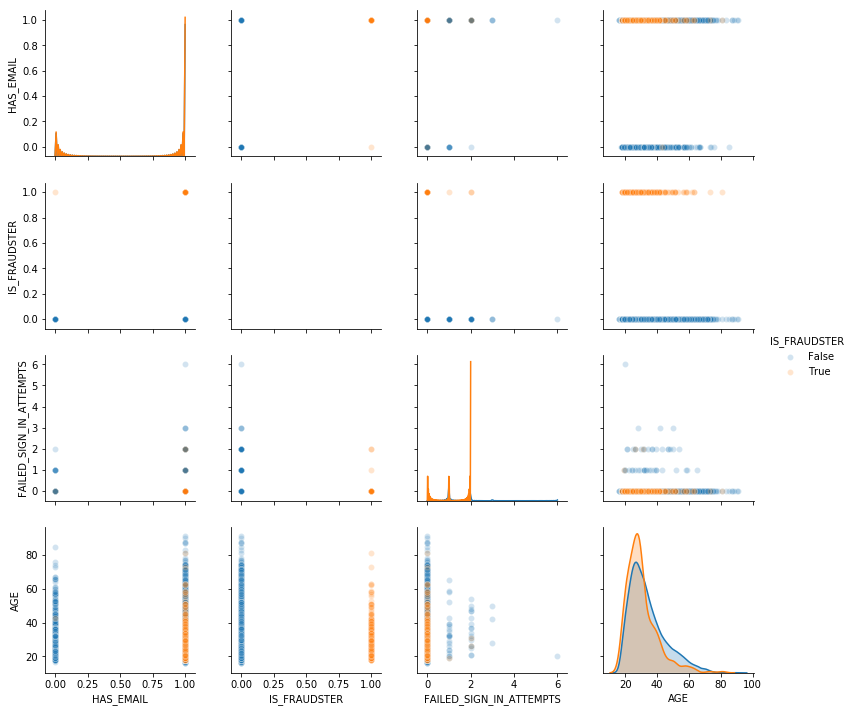

In [32]:
g=sns.pairplot(data=user_df,plot_kws={'alpha':0.2},hue='IS_FRAUDSTER');
g.fig.set_size_inches(12,10)

There is one sign of fraudster in the user-dataset that fraudsters have two attempts to sign in maximum. They were probably worried about getting caught.

In [33]:
user_df[user_df['IS_FRAUDSTER']==True]['FAILED_SIGN_IN_ATTEMPTS'].value_counts()

0    295
2      2
1      1
Name: FAILED_SIGN_IN_ATTEMPTS, dtype: int64

In [34]:
user_df[user_df['IS_FRAUDSTER']==False]['FAILED_SIGN_IN_ATTEMPTS'].value_counts()

0    9600
1      24
2      18
3       3
6       1
Name: FAILED_SIGN_IN_ATTEMPTS, dtype: int64

So my preliminary observations for fraudsters are:

*  if country of merchant differ from country/phone_country of user
*  if currency of transaction differ from country of user
*  if period on platform is very small
*  if period between transactions is too small
*  if count of transactions is not common for this user
*  or MERCHANT_CATEGORY is not common for this user
*  or TYPE is not common for this user

### Feature Engineering
  - Utilizing your findings from part a) and some creativity, create some features. Explain your reasoning behind the features.
  - Make a features.py script which when executed will create these features and store them in the DB. 

#### Now look at transactions.

In [35]:
trn_df.head()

,CURRENCY,AMOUNT,STATE,CREATED_DATE,MERCHANT_CATEGORY,MERCHANT_COUNTRY,ENTRY_METHOD,USER_ID,TYPE,SOURCE,ID
0,GBP,175,COMPLETED,2017-12-20 12:46:20.294,cafe,GBR,cont,8f99c254-7cf2-4e35-b7e4-53804d42445d,CARD_PAYMENT,GAIA,b3332e6f-7865-4d6e-b6a5-370bc75568d8
1,EUR,2593,COMPLETED,2017-12-20 12:38:47.232,bar,AUS,cont,ed773c34-2b83-4f70-a691-6a7aa1cb9f11,CARD_PAYMENT,GAIA,853d9ff8-a007-40ef-91a2-7d81e29a309a
2,EUR,1077,COMPLETED,2017-12-20 12:34:39.668,NaN,CZE,cont,eb349cc1-e986-4bf4-bb75-72280a7b8680,CARD_PAYMENT,GAIA,04de8238-7828-4e46-91f1-050a9aa7a9df
3,GBP,198,COMPLETED,2017-12-20 12:45:50.555,supermarket,GBR,cont,dc78fbc4-c936-45d3-a813-e2477ac6d74b,CARD_PAYMENT,GAIA,2b790b9b-c312-4098-a4b3-4830fc8cda53
4,EUR,990,COMPLETED,2017-12-20 12:45:32.722,NaN,FRA,cont,32958a5c-2532-42f7-94f9-127f2a812a55,CARD_PAYMENT,GAIA,6469fc3a-e535-41e9-91b9-acb46d1cc65d


In [77]:
df = trn_df.drop('ID', axis=1).merge(user_df, left_on="USER_ID", right_on="ID").drop(['ID'],axis=1)
print(df.shape)
df.head()

(638742, 19)


,CURRENCY,AMOUNT,STATE,CREATED_DATE_x,MERCHANT_CATEGORY,MERCHANT_COUNTRY,ENTRY_METHOD,USER_ID,TYPE,SOURCE,HAS_EMAIL,PHONE_COUNTRY,IS_FRAUDSTER,TERMS_VERSION,CREATED_DATE_y,COUNTRY,KYC,FAILED_SIGN_IN_ATTEMPTS,AGE
0,GBP,175,COMPLETED,2017-12-20 12:46:20.294,cafe,GBR,cont,8f99c254-7cf2-4e35-b7e4-53804d42445d,CARD_PAYMENT,GAIA,1,GB||JE||IM||GG,False,2018-05-25,2017-09-28 11:53:55.810000,GB,PASSED,0,55
1,GBP,175,COMPLETED,2017-12-19 12:40:55.325,cafe,GBR,cont,8f99c254-7cf2-4e35-b7e4-53804d42445d,CARD_PAYMENT,GAIA,1,GB||JE||IM||GG,False,2018-05-25,2017-09-28 11:53:55.810000,GB,PASSED,0,55
2,GBP,220,COMPLETED,2017-12-19 12:45:05.706,department_store,GBR,cont,8f99c254-7cf2-4e35-b7e4-53804d42445d,CARD_PAYMENT,GAIA,1,GB||JE||IM||GG,False,2018-05-25,2017-09-28 11:53:55.810000,GB,PASSED,0,55
3,GBP,210,COMPLETED,2017-12-21 07:42:25.629,NaN,GBR,cont,8f99c254-7cf2-4e35-b7e4-53804d42445d,CARD_PAYMENT,GAIA,1,GB||JE||IM||GG,False,2018-05-25,2017-09-28 11:53:55.810000,GB,PASSED,0,55
4,GBP,485,COMPLETED,2017-12-21 08:36:56.132,cafe,GBR,cont,8f99c254-7cf2-4e35-b7e4-53804d42445d,CARD_PAYMENT,GAIA,1,GB||JE||IM||GG,False,2018-05-25,2017-09-28 11:53:55.810000,GB,PASSED,0,55


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638742 entries, 0 to 638741
Data columns (total 19 columns):
CURRENCY                   638742 non-null object
AMOUNT                     638742 non-null int64
STATE                      638742 non-null object
CREATED_DATE_x             638742 non-null object
MERCHANT_CATEGORY          208677 non-null object
MERCHANT_COUNTRY           447017 non-null object
ENTRY_METHOD               638742 non-null object
USER_ID                    638742 non-null object
TYPE                       638742 non-null object
SOURCE                     638742 non-null object
HAS_EMAIL                  638742 non-null int64
PHONE_COUNTRY              638742 non-null object
IS_FRAUDSTER               638742 non-null bool
TERMS_VERSION              638742 non-null object
CREATED_DATE_y             638742 non-null object
COUNTRY                    638742 non-null object
KYC                        638742 non-null object
FAILED_SIGN_IN_ATTEMPTS    638742 non-null 

In [79]:
# Replace NaN to 'Undefined' in MERCHANT_CATEGORY and MERCHANT_COUNTRY
df = df.fillna('Undefined')

In [80]:
# Create AGE variable as age on CREATED_DATE date of profile in system
df['PROFILE_AGE'] = df.apply(lambda x: (datetime.strptime(x['CREATED_DATE_x']+('000' if '.' in x['CREATED_DATE_x'] else '.000000'), '%Y-%m-%d %H:%M:%S.%f')-datetime.strptime(x['CREATED_DATE_y'], '%Y-%m-%d %H:%M:%S.%f')).days, axis=1)

In [81]:
df['CREATED_DATE_x'] = df['CREATED_DATE_x'].apply(lambda x: (datetime.strptime(x+('000' if '.' in x else '.000000'), '%Y-%m-%d %H:%M:%S.%f').strftime("%Y-%m-%d %H:%M:%S")))

In [82]:
# No needs of CREATED_DATE_y anymore, drop them
df.drop(['CREATED_DATE_y'], axis=1, inplace=True)

In [83]:
# Transform boolean variable IS_FRAUDSTER to binary
df['IS_FRAUDSTER'] = df['IS_FRAUDSTER'].astype(int)

In [84]:
print(df.info())
print(df.describe().T)
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638742 entries, 0 to 638741
Data columns (total 19 columns):
CURRENCY                   638742 non-null object
AMOUNT                     638742 non-null int64
STATE                      638742 non-null object
CREATED_DATE_x             638742 non-null object
MERCHANT_CATEGORY          638742 non-null object
MERCHANT_COUNTRY           638742 non-null object
ENTRY_METHOD               638742 non-null object
USER_ID                    638742 non-null object
TYPE                       638742 non-null object
SOURCE                     638742 non-null object
HAS_EMAIL                  638742 non-null int64
PHONE_COUNTRY              638742 non-null object
IS_FRAUDSTER               638742 non-null int64
TERMS_VERSION              638742 non-null object
COUNTRY                    638742 non-null object
KYC                        638742 non-null object
FAILED_SIGN_IN_ATTEMPTS    638742 non-null int64
AGE                        638742 non-null 

,CURRENCY,AMOUNT,STATE,CREATED_DATE_x,MERCHANT_CATEGORY,MERCHANT_COUNTRY,ENTRY_METHOD,USER_ID,TYPE,SOURCE,HAS_EMAIL,PHONE_COUNTRY,IS_FRAUDSTER,TERMS_VERSION,COUNTRY,KYC,FAILED_SIGN_IN_ATTEMPTS,AGE,PROFILE_AGE
0,GBP,175,COMPLETED,2017-12-20 12:46:20,cafe,GBR,cont,8f99c254-7cf2-4e35-b7e4-53804d42445d,CARD_PAYMENT,GAIA,1,GB||JE||IM||GG,0,2018-05-25,GB,PASSED,0,55,83
1,GBP,175,COMPLETED,2017-12-19 12:40:55,cafe,GBR,cont,8f99c254-7cf2-4e35-b7e4-53804d42445d,CARD_PAYMENT,GAIA,1,GB||JE||IM||GG,0,2018-05-25,GB,PASSED,0,55,82
2,GBP,220,COMPLETED,2017-12-19 12:45:05,department_store,GBR,cont,8f99c254-7cf2-4e35-b7e4-53804d42445d,CARD_PAYMENT,GAIA,1,GB||JE||IM||GG,0,2018-05-25,GB,PASSED,0,55,82
3,GBP,210,COMPLETED,2017-12-21 07:42:25,Undefined,GBR,cont,8f99c254-7cf2-4e35-b7e4-53804d42445d,CARD_PAYMENT,GAIA,1,GB||JE||IM||GG,0,2018-05-25,GB,PASSED,0,55,83
4,GBP,485,COMPLETED,2017-12-21 08:36:56,cafe,GBR,cont,8f99c254-7cf2-4e35-b7e4-53804d42445d,CARD_PAYMENT,GAIA,1,GB||JE||IM||GG,0,2018-05-25,GB,PASSED,0,55,83


### Let's transform countries to CODE3 format

In [85]:
df['COUNTRY'] = df['COUNTRY'].map({c[0]: c[1] for c in cntr_df[['CODE','CODE3']].values})

In [86]:
# We have numeric values of MERCHANT_COUNTRY!
df['MERCHANT_COUNTRY'].value_counts()

Undefined    191725
GBR          136448
USA           42723
FRA           27673
LTU           25040
IRL           23653
ESP           20976
NLD           17173
POL            9365
ITA            9054
AUS            8867
DEU            8149
LUX            7045
CAN            5566
NZL            4802
CHE            4523
PRT            4513
GRC            4270
HUN            4007
LVA            3664
SWE            3541
EST            3490
ZAF            3230
THA            2877
NOR            2864
DNK            2689
CYP            2421
IDN            2289
ROM            2285
CZE            2254
              ...  
311               1
034               1
013               1
510               1
062               1
MAL               1
VGB               1
DZA               1
VES               1
185               1
033               1
643               1
077               1
NTB               1
469               1
AIA               1
HIR               1
660               1
TOK               1


In [87]:
# Test single example of numeric country code
cntr_df[cntr_df['PHONECODE']==386]

,CODE,NAME,CODE3,NUMCODE,PHONECODE
182,SI,Slovenia,sVN,705,386


In [88]:
# Trying to replace country code to CODE3
df['MERCHANT_COUNTRY'] = df['MERCHANT_COUNTRY'].apply(lambda x: (cntr_df[cntr_df['NUMCODE']==int(x)]['CODE3'].values[0] if len(cntr_df[cntr_df['NUMCODE']==int(x)]['CODE3'].values)>0 else x) if x.isdigit() else x)
df[[x.isdigit() for x in df['MERCHANT_COUNTRY'].values]].head()

,CURRENCY,AMOUNT,STATE,CREATED_DATE_x,MERCHANT_CATEGORY,MERCHANT_COUNTRY,ENTRY_METHOD,USER_ID,TYPE,SOURCE,HAS_EMAIL,PHONE_COUNTRY,IS_FRAUDSTER,TERMS_VERSION,COUNTRY,KYC,FAILED_SIGN_IN_ATTEMPTS,AGE,PROFILE_AGE
3463,EUR,10000,COMPLETED,2016-10-30 11:17:01,Undefined,386,chip,c069a845-b843-475e-af4f-a27e379f1c76,ATM,GAIA,1,GB||JE||IM||GG,0,2018-03-20,gBR,PASSED,0,49,234
3464,EUR,9000,COMPLETED,2016-10-28 10:30:21,Undefined,386,chip,c069a845-b843-475e-af4f-a27e379f1c76,ATM,GAIA,1,GB||JE||IM||GG,0,2018-03-20,gBR,PASSED,0,49,232
3480,EUR,6000,COMPLETED,2016-10-29 16:02:05,Undefined,386,chip,c069a845-b843-475e-af4f-a27e379f1c76,ATM,GAIA,1,GB||JE||IM||GG,0,2018-03-20,gBR,PASSED,0,49,234
9134,GBP,996,COMPLETED,2016-09-29 14:40:00,Undefined,000,manu,714661e3-b09b-42ef-a7b8-14a90bd455f5,CARD_PAYMENT,GAIA,1,GB||JE||IM||GG,0,2018-05-25,gBR,PASSED,0,42,75
9157,GBP,1068,COMPLETED,2016-10-29 16:15:53,Undefined,000,manu,714661e3-b09b-42ef-a7b8-14a90bd455f5,CARD_PAYMENT,GAIA,1,GB||JE||IM||GG,0,2018-05-25,gBR,PASSED,0,42,105


In [89]:
# Trying to replace country code to CODE3
# Add "C" to the missing countries
df['MERCHANT_COUNTRY'] = df['MERCHANT_COUNTRY'].apply(lambda x: (cntr_df[cntr_df['PHONECODE']==int(x)]['CODE3'].values[0] if len(cntr_df[cntr_df['PHONECODE']==int(x)]['CODE3'].values)>0 else 'C'+x) if x.isdigit() else x)
df[[x.isdigit() for x in df['MERCHANT_COUNTRY'].values]].head()

,CURRENCY,AMOUNT,STATE,CREATED_DATE_x,MERCHANT_CATEGORY,MERCHANT_COUNTRY,ENTRY_METHOD,USER_ID,TYPE,SOURCE,HAS_EMAIL,PHONE_COUNTRY,IS_FRAUDSTER,TERMS_VERSION,COUNTRY,KYC,FAILED_SIGN_IN_ATTEMPTS,AGE,PROFILE_AGE


In [90]:
# Fill NaN to Undefined and create binary variable HOMELAND to identify than transaction is made in country of user
df['COUNTRY'] = df['COUNTRY'].fillna('Undefined')
df['HOMELAND'] = df.apply(lambda x: 1 if x['COUNTRY'].upper() == x['MERCHANT_COUNTRY'].upper() else 0, axis=1)

#### Let's create some periods and statistics

In [91]:
# Functions to calculate day and hour of transactions of users
def transaction_by_day_count(dataset):
    dataset['day_of_transaction'] = dataset['CREATED_DATE_x'].apply(
        lambda x: (datetime.strptime(x, '%Y-%m-%d %H:%M:%S')).strftime('%w')
    ) 
    tmp_df = dataset.groupby(
        ['USER_ID','day_of_transaction']
    )['day_of_transaction'].size().unstack().fillna(0).reset_index()
    old_columns = [
        old_col for old_col in tmp_df.columns.tolist()
        if old_col in dataset['day_of_transaction'].unique()
    ]
    tmp_df.rename(
        columns={old_col: 'day_' + old_col for old_col in old_columns},
        inplace=True
    )
    return tmp_df

def transaction_by_hour_count(dataset):
    dataset['hour_of_transaction'] = dataset['CREATED_DATE_x'].apply(
        lambda x: (datetime.strptime(x, '%Y-%m-%d %H:%M:%S')).strftime('%H')
    ) 
    return dataset.groupby(
        ['USER_ID','hour_of_transaction']
    )['hour_of_transaction'].size().unstack().fillna(0).reset_index()

In [92]:
transaction_by_day = transaction_by_day_count(df)
transaction_by_day = transaction_by_day.set_index('USER_ID')

transaction_by_hour = transaction_by_hour_count(df)
transaction_by_hour = transaction_by_hour.set_index('USER_ID')

In [93]:
transaction_by_hour.head()

hour_of_transaction,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
USER_ID,,,,,,,,,,,,,,,,,,,,,
000e88bb-d302-4fdc-b757-2b1a2c33e7d6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0
001032e0-8071-4baf-95b9-e50214665c2e,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,3.0,2.0,...,4.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,1.0,0.0
00131af8-66f0-4526-8b5f-dc2fdb26c7d7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
001926be-3245-43fa-86dd-b40ee160b6f9,0.0,0.0,0.0,1.0,0.0,0.0,4.0,12.0,14.0,17.0,...,25.0,25.0,11.0,6.0,16.0,6.0,4.0,2.0,0.0,0.0
001cc034-5730-47c6-a70c-25f42249c9ee,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
# Join datasets
df_time = pd.merge(
    transaction_by_day,
    transaction_by_hour,
    left_index=True,
    right_index=True,)

In [95]:
df_time = df_time.reset_index()

In [96]:
df_time.to_csv('../data/time.csv')
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7748 entries, 0 to 7747
Data columns (total 32 columns):
USER_ID    7748 non-null object
day_0      7748 non-null float64
day_1      7748 non-null float64
day_2      7748 non-null float64
day_3      7748 non-null float64
day_4      7748 non-null float64
day_5      7748 non-null float64
day_6      7748 non-null float64
00         7748 non-null float64
01         7748 non-null float64
02         7748 non-null float64
03         7748 non-null float64
04         7748 non-null float64
05         7748 non-null float64
06         7748 non-null float64
07         7748 non-null float64
08         7748 non-null float64
09         7748 non-null float64
10         7748 non-null float64
11         7748 non-null float64
12         7748 non-null float64
13         7748 non-null float64
14         7748 non-null float64
15         7748 non-null float64
16         7748 non-null float64
17         7748 non-null float64
18         7748 non-null float64
19 

#### Let's transform currency

In [97]:
df = pd.merge(df, cur_df, left_on="CURRENCY", right_on="CCY")
df['IS_CRYPTO'] = df['IS_CRYPTO'].astype(int)
df['AMOUNT'] = df['AMOUNT'] * 10**df['EXPONENT']

In [98]:
df.columns

Index(['CURRENCY', 'AMOUNT', 'STATE', 'CREATED_DATE_x', 'MERCHANT_CATEGORY',
       'MERCHANT_COUNTRY', 'ENTRY_METHOD', 'USER_ID', 'TYPE', 'SOURCE',
       'HAS_EMAIL', 'PHONE_COUNTRY', 'IS_FRAUDSTER', 'TERMS_VERSION',
       'COUNTRY', 'KYC', 'FAILED_SIGN_IN_ATTEMPTS', 'AGE', 'PROFILE_AGE',
       'HOMELAND', 'day_of_transaction', 'hour_of_transaction', 'CCY',
       'EXPONENT', 'IS_CRYPTO'],
      dtype='object')

In [99]:
cols_to_select = ['USER_ID', 'CURRENCY', 'AMOUNT',
       'STATE', 'MERCHANT_CATEGORY', 'ENTRY_METHOD', 'TYPE', 'SOURCE', 'HAS_EMAIL', 
       'IS_FRAUDSTER', 'TERMS_VERSION', 'KYC', 'FAILED_SIGN_IN_ATTEMPTS', 'AGE', 'PROFILE_AGE', 'HOMELAND',
       'day_of_transaction', 'hour_of_transaction', 'IS_CRYPTO']

In [100]:
df = df[cols_to_select]

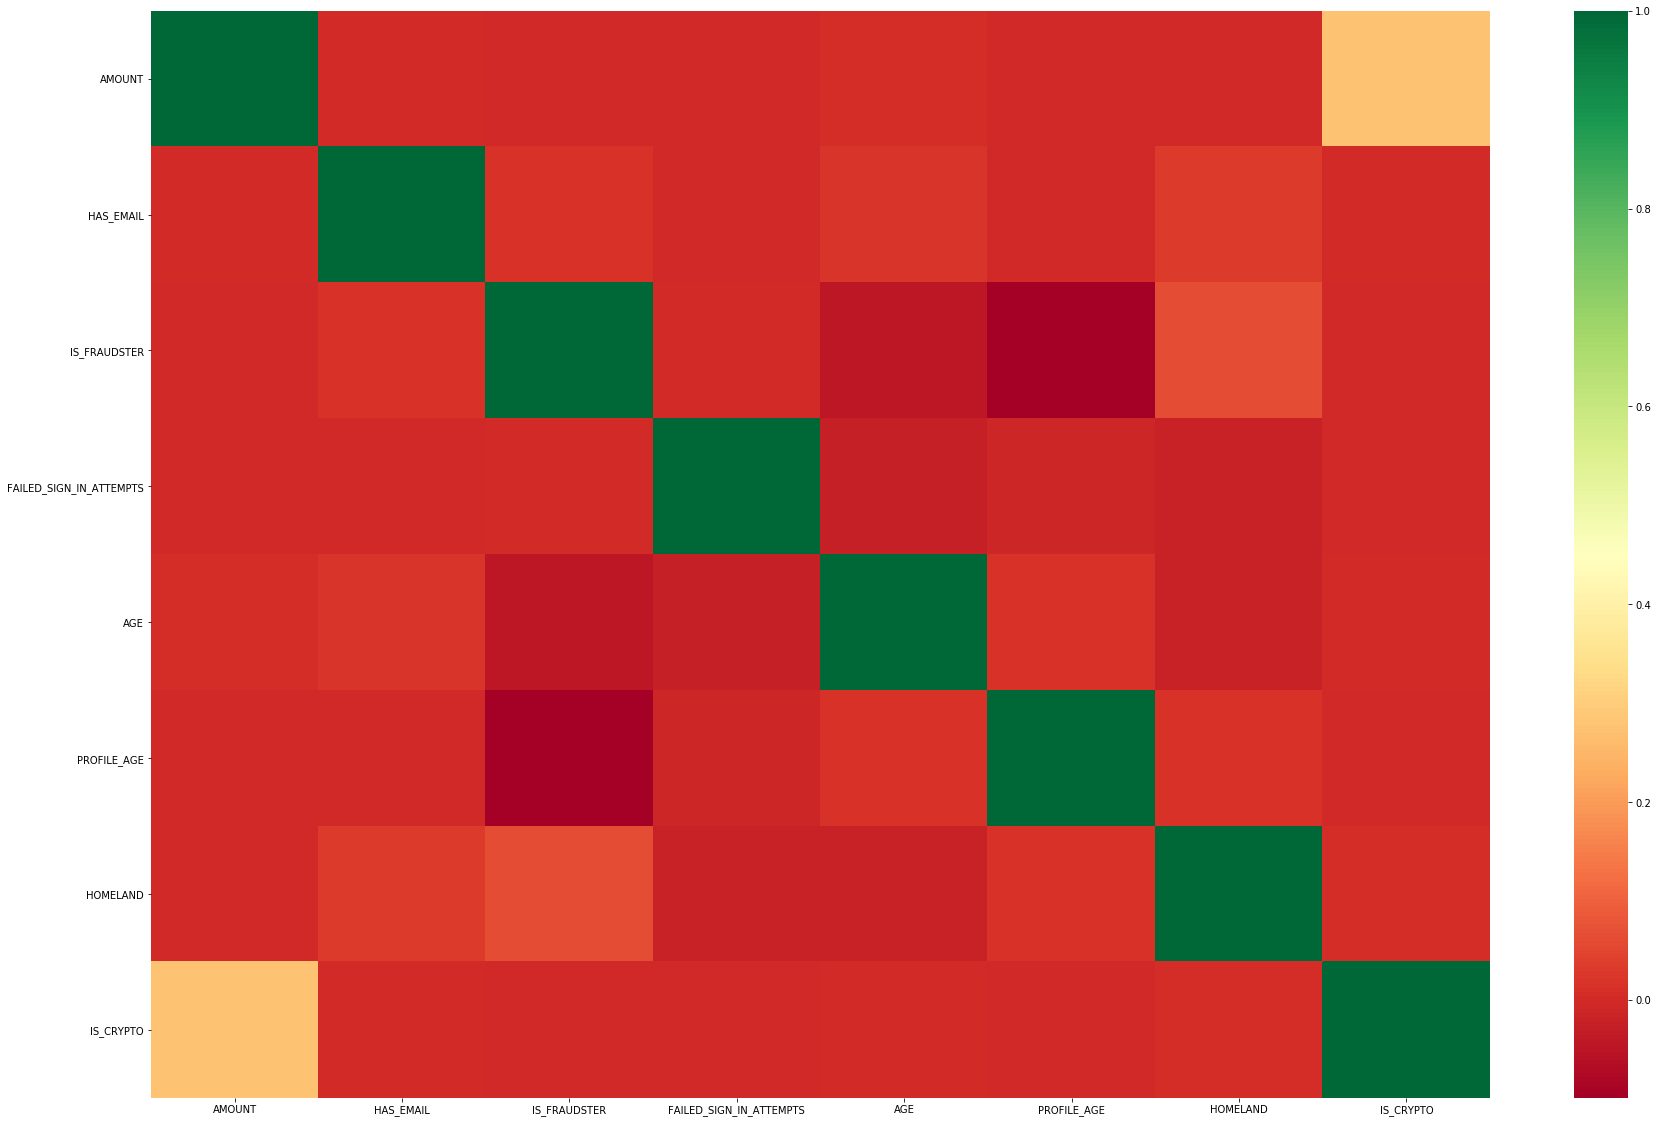

In [101]:
fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(df.corr(),annot=False,cmap="RdYlGn");

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638742 entries, 0 to 638741
Columns: 169 entries, USER_ID to KYC_PENDING
dtypes: int64(8), object(4), uint8(157)
memory usage: 159.0+ MB


In [68]:
df.to_csv('../data/dataset.csv')

SystemError: <built-in method item of numpy.ndarray object at 0x7fd677d16490> returned a result with an error set

In [ ]:
# Let's create dummy columns for categorical variables
df = pd.get_dummies(df, columns=['ENTRY_METHOD','TYPE','SOURCE','STATE','MERCHANT_CATEGORY','TERMS_VERSION','KYC'])

In [ ]:
#g=sns.pairplot(data=df,plot_kws={'alpha':0.2},hue='IS_FRAUDSTER');
#g.fig.set_size_inches(30,30)
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn");

/home/truename/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/truename/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/truename/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/truename/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **pas